### Meng Wang

# MTH9875 Homework 4

Assigned: September 15, 2016.
Due: September 29, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.

### Load some useful R-code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875-4.zip", destfile="9875-4.zip")
unzip(zipfile="9875-4.zip")

In [2]:
source("BlackScholes.R")
source("Heston.R")

## The exponential martingale

### 1. (6 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

If $B_t$ is Brownian motion, show that

$$
X_t=e^{\int_0^t \sigma_s\,dB_s-\frac12\,\int_0^t\,\sigma_s^2\,ds}
$$

is a martingale. (Hint:  Apply Itô's Lemma to $e^Y$ where $Y=\log X$.)

Deduce that

$$
e^{\frac12\,\alpha^2\,t}=\E\left[e^{\alpha\,\sqrt{t}\,Z}\right]
%\label{eq:expmartingale}
$$

where $Z \sim N(0,1)$.  Is this last equation still true if $\alpha$ is a matrix?  Why?

### Answer
$$
Y_t=\int_0^t \sigma_s dB_s-\frac{1}{2}\int_0^t \sigma_s^2 ds
$$
$$
dY_t=\sigma_t dB_t-\frac{1}{2}\sigma_t^2dt
$$
\begin{eqnarray}
dX_t&=&d(e^{Y_t})\\
&=&e^{Y_t}dY_t+\frac{1}{2}e^{Y_t}dY_tdY_t\\
&=&X_t\left(\sigma_tdB_t-\frac{1}{2}\sigma_t^2dt\right)+\frac{1}{2}X_t\sigma_t^2dt\\
&=&X_t\sigma_tdB_t
\end{eqnarray}
There is no $dt$ term in the formula of $dX_t$, so $X_t$ is a martingale.

$$
\E[X_t]=X_0=1
$$
If $\sigma_s=\alpha$,
$$
\E[e^{\alpha B_t-\frac{1}{2}\alpha^2t}]=1
$$
$$
\E[e^{\alpha B_t}]=e^{\frac{1}{2}\alpha^2t}
$$
which is equivalent to
$$
\E[e^{\alpha\sqrt{t}Z}]=e^{\frac{1}{2}\alpha^2t}
$$
The last equation is still true if $\alpha$ is a matrix since $\alpha B_t$ and $-\frac{1}{2}\alpha^2 t$ are commutative.

## Strang splitting

### 2. (4 points) 

If $A$ and $B$ are (in general non-commutative) matrices, show that

$$
e^{(A+B)\,\Delta}=e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} + \cO(\Delta^3).
$$

### Answer
By Taylor expansion,
\begin{eqnarray}
e^{(A+B)\Delta}=1+(A+B)\Delta+\frac{1}{2}(A+B)^2\Delta^2+\cO(\Delta^3)
\end{eqnarray}
\begin{eqnarray}
e^{A\Delta/2}e^{B\Delta}e^{A\Delta/2}&=&\left[1+\frac{1}{2}A\Delta+\frac{1}{8}A^2\Delta^2+\cO(\Delta^3)\right]\left[1+B\Delta+\frac{1}{2}B^2\Delta^2+\cO(\Delta^3)\right]\left[1+\frac{1}{2}A\Delta+\frac{1}{8}A^2\Delta^2+\cO(\Delta^3)\right]\\
&=&1+(A+B)\Delta+\frac{1}{2}(A^2+B^2+AB+BA)\Delta^2+\cO(\Delta^3)
\end{eqnarray}
Thus,
$$
e^{(A+B)\Delta}=e^{A\Delta/2}e^{B\Delta}e^{A\Delta/2}+\cO(\Delta^3)
$$

## Ninomiya-Victoir

### 3. (16 points)

Consider the following variance  process:

<a name="eq:varProcess"></a>(1)
$$
dv_t = -\lambda\,(v_t-\bar v)\,dt+\xi\,v_t\,dZ_t.
%\label{eq:vProcess}
$$

(a)
Let $f(v,t)=\E[g(v_T)|\cF_t]$ be the fair value at time $t$ of some claim on $v_T$.  Apply Itô's Lemma to $f$ to find the infinitesimal generator $ \cL$ of the diffusion such that 

$$
\frac{df}{dt}+ \cL f=0.
$$

(b)
Find first order differential operators $ V_0$ and $V_1$ such that

$$
 \cL= V_0+\frac12\,V_1^2.
$$

(c)  Solve the ODEs 

$$
 \frac{d }{dt} v(t) = V_0 v(t) \text{ and }  \frac{d }{dt} v(t) = V_1 v(t)
$$

with boundary condition $v(0)=v_0$.

(d)
Deduce the form of the Ninomiya-Victoir Monte Carlo time step for the variance process [(1)](#eq:varProcess) over some small time interval from $t$ to $t+\Delta$.

### Answer
(a)
<br/>$f$ is a martingale. Apply Ito's Lemma,
\begin{eqnarray}
df&=&\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial v}dv+\frac{1}{2}\frac{\partial^2f}{\partial v^2}dv^2\\
&=&\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial v}\left[-\lambda(v_t-\bar v)+\xi v_tdZ_t\right]+\frac{1}{2}\frac{\partial ^2f}{\partial v^2}\xi^2v_t^2dt\\
&=&\left[\frac{\partial f}{\partial t}-\lambda(v_t-\bar v)\frac{\partial f}{\partial v}+\frac{1}{2}\xi^2 v_t^2\frac{\partial^2 f}{\partial v^2}\right]dt+\frac{\partial f}{\partial v}\xi v_tdZ_t
\end{eqnarray}
Thus,
$$
\frac{\partial f}{\partial t}-\lambda(v_t-\bar v)\frac{\partial f}{\partial v}+\frac{1}{2}\xi^2 v_t^2\frac{\partial^2 f}{\partial v^2}=0
$$
$$
\cL=-\lambda(v_t-\bar v)\partial_v+\frac{1}{2}\xi^2 v_t^2\partial_v^2
$$

(b)
$$
V_1=\xi v_t\partial_v
$$
$$
V_1^2=\xi^2 v_t^2\partial_v^2+\xi^2 v_t\partial_v
$$
$$
V_0=\cL-\frac{1}{2}V_1^2=\left[-\lambda(v_t-\bar v)-\frac{1}{2}\xi^2 v_t\right]\partial_v
$$

(c)
<br/>Solving $\frac{d}{dt}v(t)=V_0v(t)$,
$$
\frac{dv}{dt}=-\lambda(v_t-\bar v)-\frac{1}{2}\xi^2v_t
$$
$$
e^{V_0\Delta}v_0=v(\Delta)=(v_0-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta}+\bar v'
$$
$$
\bar v'=\frac{\lambda \bar v}{\lambda+\frac{1}{2}\xi^2}
$$
Solving $\frac{d}{dt}v(t)=V_1v(t)$,
$$
\frac{dv}{dt}=\xi v_t
$$
$$
e^{V_1\sqrt{\Delta}Z}v_0=v(\sqrt{\Delta}Z)=e^{\xi\sqrt{\Delta}Z}v_0
$$

(d)
\begin{eqnarray}
v(t+\Delta)&=&e^{V_0\Delta+V_1\sqrt{\Delta}Z}v(t)\\
&\approx &e^{V_0\Delta/2}e^{V_1\sqrt{\Delta}Z}e^{V_0\Delta/2}v(t)\\
&=&e^{V_0\Delta/2}e^{V_1\sqrt{\Delta}Z}\left[(v(t)-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]\\
&=&e^{V_0\Delta/2}e^{\xi\sqrt{\Delta}Z}\left[(v(t)-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]\\
&=&\left(e^{\xi\sqrt{\Delta}Z}\left[(v(t)-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]-\bar v'\right)e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'
\end{eqnarray}

## Amend the Monte Carlo codes and generate samples

### 4. (12 points) 

(a)

Amend both the Monte Carlo code (*HestonMC2*) and the Quasi-Monte Carlo code (*HestonQMC*) from Lecture 4 to return vectors of $x=\log S_T/S_0$ and instantaneous variance $v$.

(b)

Run these amended routines with BCC parameters,  $N=100,000$, $m=8$ (16 steps), `evolve=evolveAlfonsiF` .  Save the results so you can reuse these samples of $x$ and $v$.

(c)

Write R-code to reproduce the convergence plot shown in Figure 11 of the lecture slides (with $T=1$ and strike $K=1.2$).  You should reproduce this figure with informative axis labels and helpful formatting.


### Answer
(a)

In [3]:
### Monte Carlo
HestonMC2 <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2);
    rho2m1 <<- sqrt(1-rho*rho);
    vbarp <<- vbar - eta^2/(4*lambda);
    
    negCount <- 0;
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    xm <- x; vm <- v;
    W1m <- rep(0,N); W2m <- rep(0,N); 
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2); # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2; # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
            resm <- evolve(vm,xm,T/m,W1m,W2m,L);
            xm <- resm[,1];
            vm <- resm[,2];
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L);
        x <- res[,1];
        v <- res[,2];
        negCount <- negCount +mean(v<0)/n; #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x);
    Sm <- S0*exp(xm);

    # Now we have three vectors of final stock prices
  
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));  
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm;
    AV1[i] <- mean(V1);
    AV1dev[i] <- sd(V1) / sqrt(N);
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]);
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]);
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]);
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]);
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols};
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols};
  }
  
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  res_list<-list("impliedVol"=data.out,"x"=x,"v"=v)
  return(res_list) 
}
return(res)
}

In [4]:
library(randtoolbox)

### Quasi-Monte Carlo
HestonQMC <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda
    rho <<- params$rho
    eta <<- params$eta
    vbar <<- params$vbar
    v0 <<- params$v
  
    n <- m*2 #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2)
    rho2m1 <<- sqrt(1-rho*rho)
    vbarp <<- vbar - eta^2/(4*lambda)
    
    negCount <- 0
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0
    xm <- x; vm <- v
    W1m <- rep(0,N); W2m <- rep(0,N)
    
    # Generation of quasi random numbers now takes place outside the timestep loop
    Z <- sobol(n=N,dim=n,scram=3,seed=4711,norm=T)
      Zperp <- sobol(n=N,dim=n,scram=3,seed=17,norm=T)
      
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- Z[,i] #Take ith column of pre-generated quasi-rvs
        W2 <- Zperp[,i]
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1)
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2)
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1 # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p) 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2) # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2 # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            resm <- evolve(vm,xm,T/m,W1m,W2m,L)
            xm <- resm[,1]
            vm <- resm[,2]
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L)
        x <- res[,1]
        v <- res[,2]
        
  }

    S <- S0*exp(x)
    Sm <- S0*exp(xm)

    # Now we have three vectors of final stock prices
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm
    AV1[i] <- mean(V1)
    AV1dev[i] <- sd(V1) / sqrt(N)
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i])
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i])
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i])
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i])
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols}
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols}
  }
  
  data.out <- data.frame(AK,rep(N,M),rep(2*m,M),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom)
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","2sd","ivolm", "ivolRichardson", "biasRichardson",
                       "2sdRichardson")
  res_list<-list("impliedVol"=data.out,"x"=x,"v"=v)
  return(res_list)
  
}
return(res)
}

Loading required package: rngWELL
This is randtoolbox. For overview, type 'help("randtoolbox")'.


(b)

In [6]:
evolveAlfonsiF <- function(v,x,dt,W1,W2,L=NULL){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = 0.04)

In [7]:
strikes<-c(0.8,1.0,1.2)
exactHestonVolsBCC <- sapply(strikes,function(K){impvolHeston(paramsBCC)(log(K),1)})

### run Monte Carlo and save x,v
res_MC<-HestonMC2(paramsBCC)(S0=1, T=1, AK=strikes, N=100000, m=8, evolve=evolveAlfonsiF, exactVols=exactHestonVolsBCC)
x_MC<-res_MC$x
v_MC<-res_MC$v
print("Monte Carlo")
print(res_MC$impliedVol)

### run Quasi-Monte Carlo and save x,v
res_QMC<-HestonQMC(paramsBCC)(S0=1,T=1,AK=strikes,N=100000,m=8,evolve=evolveAlfonsiF,exactVols=exactHestonVolsBCC)
x_QMC<-res_QMC$x
v_QMC<-res_QMC$v
print("Quasi-Monte Carlo")
print(res_QMC$impliedVol)

[1] "Monte Carlo"
  Strikes Paths Steps      ivol         bias       twoSd     ivolm
1     0.8 1e+05    16 0.2292330 0.0002372752 0.004389742 0.2290890
2     1.0 1e+05    16 0.1820751 0.0003469647 0.001562864 0.1820540
3     1.2 1e+05    16 0.1524599 0.0004121754 0.001120350 0.1526414
  ivolRichardson biasRichardson twoSdRichardson
1      0.2293770   0.0003812298     0.004459526
2      0.1820962   0.0003680536     0.001603978
3      0.1522782   0.0002304409     0.001164820
[1] "Quasi-Monte Carlo"
  Strikes Paths Steps      ivol          bias         2sd     ivolm
1     0.8 1e+05    16 0.2291244  0.0001286677 0.004377674 0.2289755
2     1.0 1e+05    16 0.1814651 -0.0002630298 0.001558007 0.1814211
3     1.2 1e+05    16 0.1517967 -0.0002510450 0.001119462 0.1519832
  ivolRichardson biasRichardson 2sdRichardson
1      0.2292733   0.0002775190   0.004448931
2      0.1815091  -0.0002190575   0.001599923
3      0.1516099  -0.0004378812   0.001170937


(c)

[1] "MC"
[1] "QMC"


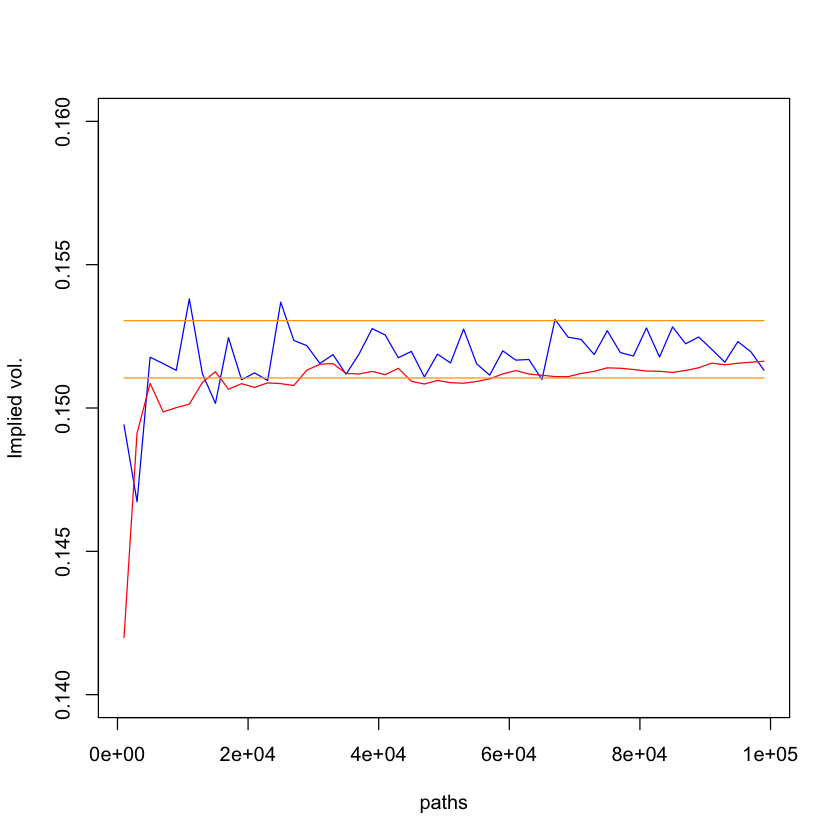

In [8]:
impliedVol_MC<-function(N){HestonMC2(paramsBCC)(S0=1, T=1, AK=1.2, N, m=8, evolve=evolveAlfonsiF, exactVols=NULL)$impliedVol["ivolRichardson"][1,]}
impliedVol_QMC<-function(N){HestonQMC(paramsBCC)(S0=1, T=1, AK=1.2, N, m=8, evolve=evolveAlfonsiF, exactVols=NULL)$impliedVol["ivolRichardson"][1,]}

paths<-seq(1000,100000,2000)
print("MC")
ivol_MC<-sapply(paths,impliedVol_MC)
print("QMC")
ivol_QMC<-sapply(paths,impliedVol_QMC)

yrange <- c(0.14, 0.16)
plot(paths,ivol_MC,type="l",col="blue",ylim=yrange,ylab="Implied vol.")
lines(paths,ivol_QMC,col="red",ylim=yrange)

impliedVol_exact<-impvolHestonRaw(paramsBCC)(k=log(1.2),t=1)
highVol <- rep(impliedVol_exact+0.001,length(paths))
lowVol <- rep(impliedVol_exact-0.001,length(paths))
lines(paths,highVol,col="orange")
lines(paths,lowVol,col="orange")

Implied vols for a call ( T=1
 ,  K=1.2
 ); MC in blue; QMC in red;  0.1
  vol point threshold in orange.

### 5.  (10 points) 

For the following, use the samples of $x$ and $v$ generated using MC and QMC with 100,000 paths from Problem 4.

(a)

Plot the Heston implied volatility smile from the quasi-closed-form Heston formula.  Superimpose MC and QMC smiles to reproduce something like Figure 11 in Lecture 4.

(b)

Using both MC and QMC samples from Problem 4, numerically estimate the local volatility function

$$
v_\ell(x,1)=\E[v_1|x_1=x]
$$

and plot $v_\ell(x,1)$ as a function of $x$.  (Tip: I recommend binning the data rather than running *e.g.* kernel regression.)

(c)

Superimpose the Heston implied variance smile (use part (a)) on your local variance smile from part (c) to reproduce something like Figure 12 (but with only 100,000 paths).  Comment on the qualitative features of the implied volatility and local volatility smiles.

### Answer
(a)

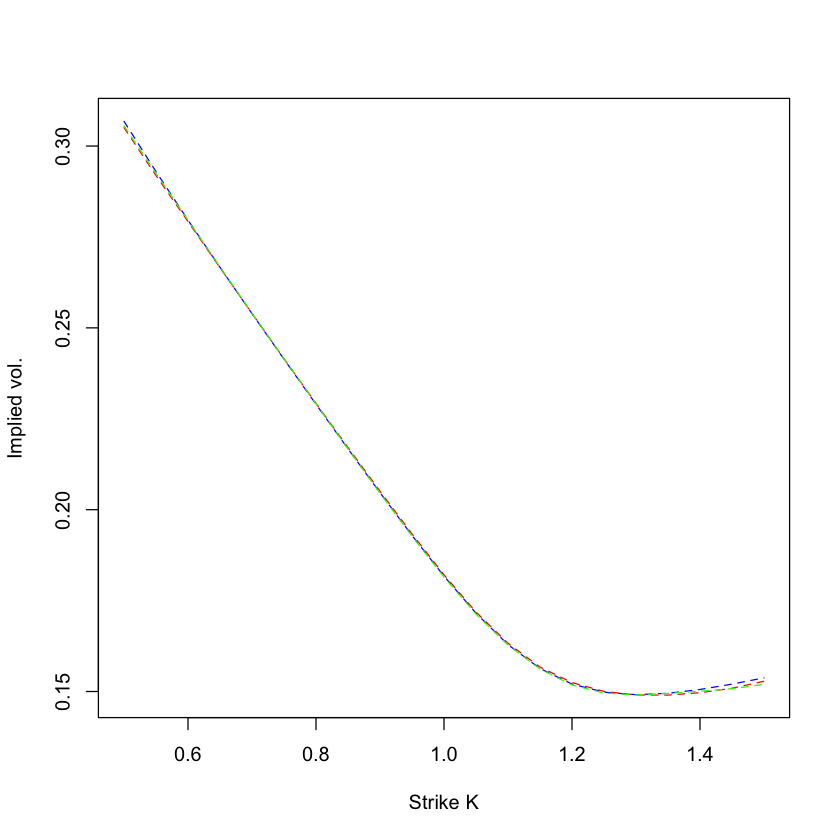

In [9]:
### quasi-closed-form
iVol_exact_K<-function(K){impvolHestonRaw(paramsBCC)(k=log(K),t=1)}
### MC
iVol_MC_K<-function(K){
    S<-exp(x_MC);
    V <- (S>K)*(S - K);
    AV <- mean(V);
    BSV<- BSImpliedVolCall(1, K, 1, 0, AV);
    return(BSV)
}
### QMC
iVol_QMC_K<-function(K){
    S<-exp(x_QMC);
    V <- (S>K)*(S - K);
    AV <- mean(V);
    BSV<- BSImpliedVolCall(1, K, 1, 0, AV);
    return(BSV)
}
### plot
Ks<-seq(0.5,1.5,0.05)
iVol_exact<-sapply(Ks,iVol_exact_K)
iVol_MC<-sapply(Ks,iVol_MC_K)
iVol_QMC<-sapply(Ks,iVol_QMC_K)
plot(Ks,iVol_exact,type="l",lty=2,col="blue",xlab="Strike K",ylab="Implied vol.")
lines(Ks,iVol_MC,col="red",lty=2)
lines(Ks,iVol_QMC,col="green",lty=2)

Exact implied vols in blue; MC in red; QMC in green

(b)&(c)

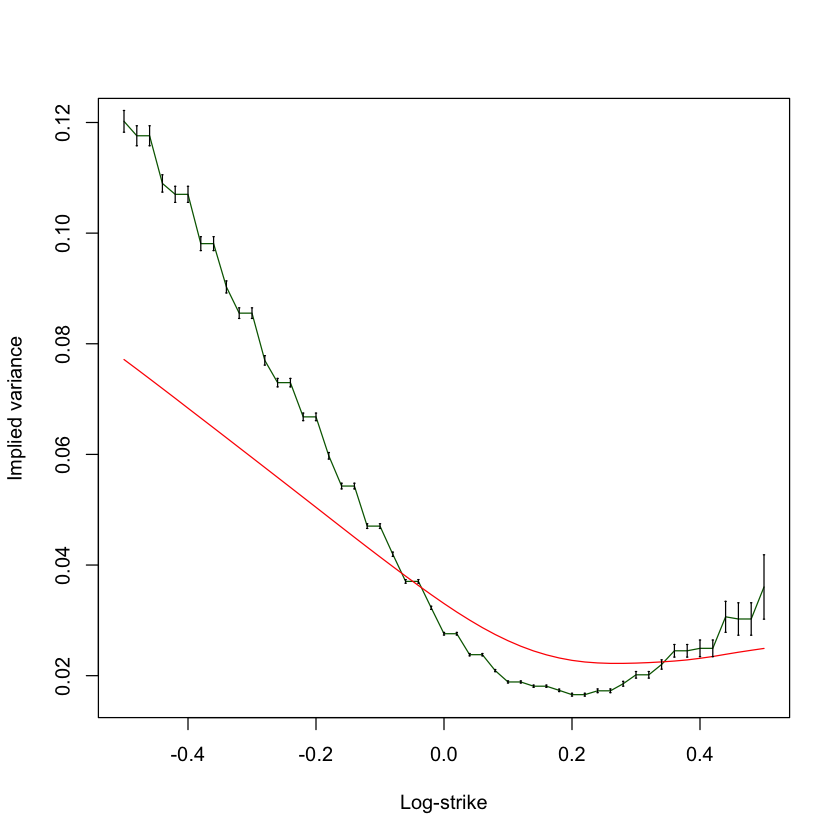

In [10]:
xv_MC<-cbind(x_MC,v_MC)
xv_QMC<-cbind(x_QMC,v_QMC)
xv<-data.frame(rbind(xv_MC,xv_QMC))
colnames(xv)<-c("x_sample","v_sample")
x_min<-min(xv[,"x_sample"])
x_max<-max(xv[,"x_sample"])
bins<-100
itv<-(x_max-x_min)/bins

### local variance
localVol<-function(x){
    i<-floor((x-x_min)/itv)
    xl<-x_min+i*itv
    xh<-x_min+(i+1)*itv
    xv.subset<-subset(xv,x_sample>=xl&x_sample<xh)
    v_mean<-mean(xv.subset[,"v_sample"])
    v_std<-sd(xv.subset[,"v_sample"])/sqrt(dim(xv.subset)[1])
    return(cbind(v_mean,v_std))
}

x<-seq(-0.5,0.5,0.02)
lVol<-sapply(x,localVol)

iVol<-sapply(x,function(x){((iVol_MC_K(exp(x))+iVol_QMC_K(exp(x)))/2)^2})
plot(x,lVol[1,],type="l",col="dark green",xlab="Log-strike",ylab="Implied variance")
lines(x,iVol,col="red")

### add error bars
dx<-0.001
for(i in 1:length(x)) {
    high<-lVol[1,i]+lVol[2,i]
    low<-lVol[1,i]-lVol[2,i]
    segments(x[i],low,x[i],high)
    segments(x[i]-dx, high , x[i]+dx, high)
    segments(x[i]-dx, low , x[i]+dx, low)
}

Local variance (dark green) obtained by binning final variance (with error bars); implied variance (red) is superimposed

Local variance is larger than implied variance when log-strike is very large or very small, and smaller than implied variance when log-strike is slightly greater than 0.